In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('diabetes.csv')

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
X = df.iloc[:,:7]
y = df['Outcome']

In [15]:
# convert labels to binary
y = (y == 0).astype(int)

In [28]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=46)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])

        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                #print("Ypredict = ", self.predict(xi))
                #print("Y = ", target)
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)

            self.errors.append(error)


        return self
        print(self.errors)
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def plot_decision_boundary(self, X, y):
      plt.figure(figsize=(8, 6))
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

      ax = plt.gca()
      xlim = ax.get_xlim()
      ylim = ax.get_ylim()

      xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                            np.linspace(ylim[0], ylim[1], 50))

      Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)

      plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
      plt.xlim(xlim)
      plt.ylim(ylim)

      plt.title('Perceptron Decision Boundary')
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.show()

In [31]:

perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

In [32]:
y_pred = perceptron.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.43%


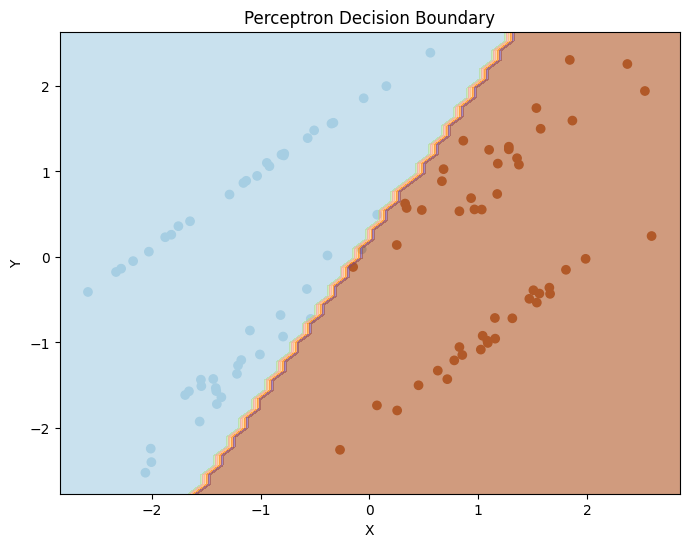

In [ ]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create and train a perceptron model
clf = Perceptron()
clf.fit(X, y)

# Plot the decision boundary
clf.plot_decision_boundary(X, y)